In [1]:
import numpy as np
import random
import math
from matplotlib import pyplot as plt

from pso import PSO
from gsa import GSA
from abc_py import ABC
from benchmark import F6 as test

''' Constant variable '''

######## Global variable #########
RUNS = 1
AGENT_NUM = 50
ITER_KINDS = 2
ALGO = 3
ITER = [500, 2500]
RESULTS = np.zeros((ALGO, RUNS, ITER_KINDS, ITER[1]))                   # Store all the result for the whole runs
AVERAGE_RESULT = np.zeros((ALGO, ITER_KINDS, ITER[1]))                   # Store all the result for the whole runs

##################################

######### PSO variable ###########

##################################

######### GSA variable ###########
epsilon = 0
G_0 = 10
ALPHA = 20
K_best = 50
end_thres = 1e-5
##################################

######### ABC variable ###########

##################################

In [2]:
def plot_result():
    x1 = np.arange(0,  500,  1) 
    x2 = np.arange(0,  2500,  1) 
    plt.figure(1)
    # plt.subplot(3,  1,  1)  
    plt.title("ITER 500") 
    plt.xlabel("iter") 
    plt.ylabel("fitness") 
    for i in range(ALGO):
      tmp = AVERAGE_RESULT[i][0].copy()
      tmp.resize(ITER[0])
      plt.plot(x1, tmp) 

    plt.figure(2)
    # plt.subplot(3,  1,  3)  
    plt.title("ITER 2500") 
    plt.xlabel("iter") 
    plt.ylabel("fitness") 
    for i in range(ALGO):
      plt.plot(x2, AVERAGE_RESULT[i][1]) 
    plt.show()

Iteration: 1, best is 622.0
[ 2.51438507e+00 -1.22788385e+00  2.75518094e+00  3.37738025e+00
 -2.31841877e+00 -9.69029571e-01  3.05274268e+00 -8.55925198e-01
 -5.59140606e+00 -8.36084576e+00 -6.64673482e-01 -9.78699707e+00
  4.39565389e-01 -2.40536486e+00  4.39151294e-01 -9.48954059e+00
  9.37616058e+00 -8.08010596e-01 -5.14306840e+00 -1.50244699e+00
 -2.79304806e+00 -5.58167415e+00 -8.45180449e-01  4.95681607e+00
  7.05271723e+00 -3.72002521e+00  5.52906858e+00 -1.11097809e-03
  3.04285576e+00 -5.89662466e-01]
Iteration: 2, best is 622.0
[  1.60223673  -2.63061417  -4.63520954  -2.15132437  -0.5602577
 -10.           2.06582211  -0.17487552  -7.36367033  -5.9046791
   3.34904536 -10.          -3.22833445   0.22733092  -1.16354716
 -10.          -0.09450117   1.1112369   -2.35242268  -1.66729667
  -6.56980534  -2.33886227   0.49350135   4.38492265   5.63646593
  -5.76635492   3.27748615   0.35867683  -1.1657112   -1.03171748]
Iteration: 3, best is 612.0
[ -4.39502031  -3.57958054 -10. 

Best:  [ 2.16468343 -0.94020044  2.35789978  3.10961494 -1.84473232 -0.77294833
  2.53350735 -0.66525264 -4.95161705 -7.19110049 -0.68302453 -8.71947483
  0.69539853 -2.10844565  0.42490958 -8.16229043  8.19762149 -0.89396358
 -4.54603814 -1.19348728 -2.58461062 -5.10145707 -0.70863753  4.04179844
  6.29101652 -3.06439609  4.75782509  0.06456345  2.81627683 -0.33795587] fitness:  479.0
Best:  [ 1.56110616 -0.37431395  2.12161316  2.71411295 -1.12014954 -0.51584946
  1.83470658 -0.47391212 -3.86437055 -5.63945846 -0.79792814 -7.02144207
  0.97528767 -1.47803213  0.51763749 -6.57335255  6.26755349 -0.98807027
 -3.99823861 -0.87910708 -2.17445249 -4.2380323  -0.46916879  2.6944785
  5.57838472 -2.00937375  3.80359066 -0.03017693  2.26661649 -0.07916906] fitness:  320.0
Best:  [ 1.26325866 -0.18766829  1.46576182  2.15329986 -0.46879399 -0.27462424
  0.94235336 -0.35423238 -2.8428675  -3.62798672 -0.891917   -4.83773306
  1.30887028 -1.28447241  0.48817438 -4.17145208  4.86158938 -0.994530

Best:  [-0.01077887 -0.15964079  0.02437557  0.48310232 -0.17233716 -0.30843807
 -0.23441441 -0.09034485  0.26677168  0.0346236  -0.10121057  0.0551557
  0.27220285  0.2694425   0.95131762 -0.33502333  0.00747132 -0.52847657
 -0.34932372  0.10336993 -0.36235597 -0.01405665  0.178079   -0.18597699
  0.65564897  0.35604818  0.13450376 -0.10273339 -0.10592989  0.32323167] fitness:  3.0
Best:  [-0.07760814 -0.38855363  0.04298254  1.055355    0.41467923 -0.37221656
 -0.13399529  0.02171052 -0.28305988 -0.08493884 -0.12679449 -0.15748145
  0.14994371  0.2569607   0.89350268  0.5755021   0.01963053 -0.8401743
 -0.19108006  0.28330792 -0.46336353  0.03549769  0.05652605 -0.13943082
  0.68424558  0.31154549  0.09595153  0.53684928 -0.07247658  0.27644075] fitness:  6.0
Best:  [ 0.12676724 -0.12158571  0.02379731  0.70864498  0.07035731 -0.316119
 -0.27582631 -0.11711965  0.00781194 -0.0912206  -0.00683582 -0.03655932
  0.14095931  0.26483985  0.91301255  0.01942006 -0.03383974 -0.6576599
 -0.2

Best:  [-3.19300463e-02  9.41485274e-03 -2.37804022e-02  3.12323225e-01
 -5.86366646e-02 -2.76793143e-01 -6.86825681e-02 -3.36078745e-02
  2.48357669e-04  3.99175551e-02 -4.51424587e-02 -9.16821639e-02
  6.89224235e-02  1.17931707e-01  8.39760897e-01  1.67211875e-01
  2.00865066e-01 -1.72256668e-01 -2.32459410e-01 -1.44397250e-03
  6.16794817e-02  3.46283433e-02  1.04452623e-01  9.35792531e-03
  2.22998689e-01  9.89474488e-02  1.90486907e-01 -1.89301641e-01
  3.71956926e-01  1.35037347e-01] fitness:  1.0
Best:  [-0.03703516  0.01033831 -0.01628904  0.31350581 -0.07158322 -0.28308255
 -0.06843988 -0.0280921   0.05807374  0.02225078 -0.05319153 -0.08501997
  0.01186391  0.09830254  0.84546734  0.15946428  0.16959653 -0.19323167
 -0.2328579  -0.00227747  0.07418355  0.04187893  0.10564234  0.02822316
  0.21728178  0.09910718  0.19841729 -0.17762016 -0.16040798  0.12087627] fitness:  1.0
Best:  [-0.03832353  0.00161354 -0.01557906  0.32838142 -0.05890358 -0.27545999
 -0.08553518 -0.0346552

Best:  [-0.04817067  0.05385836  0.02151122  0.32346255 -0.08507829 -0.28001278
 -0.07303626 -0.03733259  0.00684719  0.01075073 -0.07813064 -0.04767137
  0.01043604  0.07930175  0.87171558  0.15048001  0.11163613 -0.20012548
 -0.21985977 -0.00748686  0.07853668  0.07430313  0.07962789  0.0074595
  0.20558075  0.07528101  0.19517882 -0.20937776 -0.02949973  0.08172999] fitness:  1.0
Best:  [-0.04379696  0.042538    0.01316254  0.33039037 -0.0697929  -0.27815391
 -0.07118277 -0.03428508  0.01659635  0.01978871 -0.05438121 -0.07457403
  0.05428122  0.07186199  0.86101021  0.15279466  0.11282654 -0.15507281
 -0.21912221  0.0209632   0.08340353  0.050753    0.0766293   0.00120503
  0.23031387  0.11609163  0.19032615 -0.19860539 -0.0414865   0.09629956] fitness:  1.0
Best:  [-0.0520457   0.02368823  0.01002718  0.32671366 -0.07541725 -0.27020092
 -0.0692714  -0.04197453 -0.00127173  0.05989836  0.01907747 -0.06824062
  0.03519006  0.06610582  0.87504996  0.15038543  0.20951459 -0.18661312
 

Best:  [-0.05234566  0.03805294  0.01303852  0.31832135 -0.08191385 -0.28129292
 -0.06237925 -0.03218737 -0.00302637  0.01233931 -0.04430824 -0.08575491
  0.05554541  0.07272747  0.86024406  0.15461562  0.1185166  -0.18971551
 -0.24374492  0.03639972  0.07418822  0.05411105  0.08725729  0.02024268
  0.22187487  0.11899518  0.19858085 -0.20365288 -0.03290053  0.07333622] fitness:  1.0
Best:  [-0.05142844  0.04179408  0.00333184  0.32104566 -0.08309421 -0.27756433
 -0.0629249  -0.03241866 -0.00177142  0.01052574 -0.04510738 -0.07277224
  0.05731381  0.07147915  0.86165312  0.15339555  0.14306704 -0.19738082
 -0.24471563  0.03276104  0.07113998  0.04467591  0.09096681  0.02055799
  0.21450146  0.11050705  0.20043592 -0.20337334 -0.02732905  0.07716061] fitness:  1.0
Best:  [-0.04323784  0.05694717  0.01112156  0.32348815 -0.06524889 -0.27829088
 -0.05673532 -0.02899269 -0.00214902  0.01479499 -0.0440726  -0.03633708
  0.06659131  0.06821736  0.85430884  0.15324023  0.11831358 -0.20188377


Iteration: 53, best is 74.0
Iteration: 54, best is 74.0
Iteration: 55, best is 74.0
Iteration: 56, best is 66.0
Iteration: 57, best is 66.0
Iteration: 58, best is 57.0
Iteration: 59, best is 57.0
Iteration: 60, best is 57.0
Iteration: 61, best is 57.0
Iteration: 62, best is 57.0
Iteration: 63, best is 57.0
Iteration: 64, best is 55.0
Iteration: 65, best is 55.0
Iteration: 66, best is 55.0
Iteration: 67, best is 52.0
Iteration: 68, best is 52.0
Iteration: 69, best is 50.0
Iteration: 70, best is 46.0
Iteration: 71, best is 46.0
Iteration: 72, best is 43.0
Iteration: 73, best is 41.0
Iteration: 74, best is 41.0
Iteration: 75, best is 37.0
Iteration: 76, best is 37.0
Iteration: 77, best is 36.0
Iteration: 78, best is 36.0
Iteration: 79, best is 33.0
Iteration: 80, best is 33.0
Iteration: 81, best is 33.0
Iteration: 82, best is 32.0
Iteration: 83, best is 32.0
Iteration: 84, best is 31.0
Iteration: 85, best is 26.0
Iteration: 86, best is 26.0
Iteration: 87, best is 26.0
Iteration: 88, best 

[ 0.36433338  1.06130147  0.02898339  0.28829624  0.07816276 -1.57391074
  0.51744512  0.62154604 -1.90513059 -1.41766939 -0.05814658 -1.14721582
  0.18662596  2.25900952  0.86749453  1.3595825   0.90932598  0.23003172
 -1.10815925 -0.28978458 -0.15572321  0.1500561   1.35801021 -0.93493034
  0.26431918  1.74945654 -1.82727181  0.3235515   1.38009522  0.40143897]
Iteration: 55, best is 32.0
[ 0.36433338  1.06130147  0.02898339  0.28829624  0.07816276 -1.57391074
  0.51744512  0.62154604 -1.90513059 -1.41766939 -0.05814658 -1.14721582
  0.18662596  2.25900952  0.86749453  1.3595825   0.90932598  0.23003172
 -1.10815925 -0.28978458 -0.15572321  0.1500561   1.35801021 -0.93493034
  0.26431918  1.74945654 -1.82727181  0.3235515   1.38009522  0.40143897]
Iteration: 56, best is 32.0
[-0.30450053  0.97243805  0.32755432  0.26211531 -0.01281319 -1.43456279
  0.52492745  0.38624709 -2.04845537 -1.49630561 -0.10719958 -1.24778453
  1.4229574   2.26163734  1.00330741  1.32526625  0.89513481  0.21

Best:  [-1.72812886  6.07758661  1.28380044 -4.15449537  2.51810764 -7.97673903
 -0.28450303  0.6157868   5.237641    0.79180225 -0.60263275  4.55795716
 -0.56236541 -1.8131354   7.10325787  2.95529456 -2.33489091 -3.03809949
  6.2853233   5.92497655 -4.63577604  2.40732177  1.4672846  -0.33149175
 -6.72138938  3.20268465  1.55909974 -0.1710685  -0.06262634  8.56189905] fitness:  504.0
Best:  [-1.48840412  4.75732468  1.09335348 -3.63362071  1.67369367 -6.47151413
 -0.46632635  0.60687102  3.74455336  0.46716661 -0.58940183  3.6887108
 -0.23526815 -1.53540315  5.18150751  2.10948728 -1.70835672 -2.27984548
  5.02124352  4.45192583 -3.78999316  2.08502138  0.88779735 -0.3629283
 -5.87471788  2.88176899  1.25934756 -0.19259623 -0.0826921   6.69034603] fitness:  315.0
Best:  [-9.89116972e-01  2.82504087e+00  7.45296166e-01 -2.59747238e+00
  1.00380555e+00 -5.06241730e+00 -3.66647980e-01  6.40525793e-01
  1.88523311e+00 -8.61693609e-02 -5.38574438e-01  2.95721396e+00
 -4.17075218e-03 -1.19

Best:  [ 0.49246549 -0.1836104  -0.18100427  0.9407035   0.02798035 -0.03961183
 -0.48105509 -1.2736533  -0.49426396 -0.70482928  0.41235669  0.58779478
  0.3137644  -0.11615286 -0.24051465 -0.0352602   0.08665736  0.27897207
 -0.13564653  1.08369392  0.77281789 -0.14045722  0.56306922  0.12394846
 -0.39390303  0.23088241  0.25956101  0.53042685  0.17101433 -0.27064528] fitness:  8.0
Best:  [ 0.03581346 -0.29404196 -0.15855869  0.02065072  0.01215103  0.06146858
 -0.01543464  0.05985232  0.02551015 -0.506209    0.00296182  0.23488088
  0.29329309 -0.12856936  0.21040922 -0.29597983  0.21321334  0.19089972
 -0.10324677  0.41374614  0.14700474 -0.48570905  0.3487611   0.33285642
 -0.29126875  0.18780831 -0.06579342  0.23058081  0.18198404  0.19406788] fitness:  1.0
Best:  [ 0.51936238 -0.54724824 -0.42902626  0.85722762 -0.18089734  0.65166613
 -0.35074188 -0.21692682 -0.7720893  -0.01400917 -0.02398051  0.54955368
  0.25795563  0.39398974  0.40600604 -0.10979839  0.03269988  0.36066283


Best:  [ 0.00494415  0.04896596 -0.07546812 -0.14533246  0.00842547  0.15464669
 -0.52386214 -0.05494413 -0.25371158  0.34569109  0.38913251 -0.07990506
 -0.17763548 -0.01005299  0.34503534 -0.24587923  0.21202011  0.06462146
  0.93124128  0.23632675  0.1309262   0.11358617  0.24838425 -0.05961744
  0.00741257  0.01410606 -0.0550938   0.29215377 -0.24640201  0.68174184] fitness:  3.0
Best:  [ 0.09262308 -0.16219562 -0.33606718 -0.00539297  0.19238003  0.274951
  0.26265809  0.00671043 -0.23324601  0.04543581  0.2522012   0.22052087
 -0.17260228 -0.17661543  0.09447658  0.08565121  0.14117587  0.18438534
  0.18238305 -0.13131037  0.01067535 -0.10131532 -0.08029196  0.11359661
 -0.3052326  -0.01352415 -0.06639603  0.22479331 -0.09668753  0.35575754] fitness:  0.0
Best:  [ 0.00115982 -0.30479775  0.1643038  -0.0453825   0.18111204  0.74968932
 -0.32569224  0.48861377 -0.16840368 -0.05631533  0.21361935  0.30223078
 -0.27909329 -0.29426872 -0.20358452  0.13967383  0.23241995 -0.03015225
  

Best:  [ 0.25572831 -0.69068096  0.05723945  0.10738176  0.09622682 -0.09240883
  0.01051381 -0.33269889 -0.28156673  0.15478241  0.04808851 -0.10675083
  0.09257782  0.21960576  0.09759862 -0.12841985  0.33023841  0.13979642
  0.02195471 -0.23884017  0.09133068 -0.25365467  0.0629572   0.35074431
 -0.21866318  0.1194642  -0.2730725   0.00971519 -0.22224875  0.09637121] fitness:  1.0
Best:  [ 0.11415363 -0.35294336 -0.15169859  0.08895953  0.53627965  0.17060207
 -0.04486352  0.2506865  -0.34092327  0.23747251  0.10139197 -0.01498895
  0.02328419 -0.45189968  0.06028058 -0.13986472  0.30032083  0.0132385
  0.26988272 -0.15743857  0.07428477 -0.09734835  0.06671052  0.08671855
 -0.23727099  0.15311804 -0.27487257  0.01601531  0.20685103  0.19212303] fitness:  1.0
Best:  [ 0.2413025   0.63750613 -0.42750081 -0.08524232  0.20126287 -0.19687393
 -0.04161182 -0.38989781 -0.2536858   0.07640747 -0.08825932  0.18549987
  0.13482496  0.3117713   0.08894567 -0.2026511   0.34429826  0.07024207
 

Best:  [ 0.13494881 -0.41641028  0.24783618  0.06789706 -0.21464146  0.0995609
 -0.47387117 -0.05611786 -0.4401959  -0.02020173 -0.20017936 -0.07551289
  0.1774827   0.15494525  0.16974163 -0.37988297  0.20200799  0.29957608
  0.54404241 -0.47292769  0.08010758  0.02375102 -0.24898922 -0.20865162
  0.88380077  0.16168518 -0.15253555  0.02129879  0.04999387  0.02215941] fitness:  2.0
Best:  [ 0.22051327 -0.04695513  0.2923893   0.06317865 -0.29195675  0.07456744
 -0.08093299  0.10191435 -0.21443504  0.0019609  -0.08909797 -0.02478007
  0.09533437 -0.037966    0.16405723 -0.25091887  0.22920932  0.19610169
  0.17227164 -0.26350013 -0.06598257  0.03657055  0.05870073  0.31477095
  0.28031898  0.07249564 -0.35603386  0.02412839  0.18698124 -0.05681604] fitness:  0.0
Best:  [ 0.28034132 -0.16334733  0.20866028 -0.01400516 -0.11979914 -0.06799873
 -0.08681454  0.13939392 -0.06439024 -0.01664672 -0.11626799 -0.06024278
 -0.00990522 -0.41474269  0.03430666 -0.30482411  0.22716214  0.00406409
 

Best:  [ 0.25758921 -0.43374784  0.08452509  0.39601868 -0.29786392 -0.17915974
  0.13341313  0.21737398 -0.21832425  0.1916193  -0.06860697  0.03484459
 -0.04479169 -0.09031081  0.1600214  -0.21550378  0.31380288  0.3142832
  0.21765252 -0.29908442  0.51641853 -0.16761084  0.23203837  0.13324827
  0.04950179  0.12812606 -0.41829662 -0.24244463  0.31579274  0.07396672] fitness:  1.0
Best:  [ 0.23914592 -0.11526011  0.04762896  0.29211887 -0.19888367 -0.1005504
 -0.09062751  0.10542023 -0.21789693  0.26061427 -0.23281335  0.00581453
 -0.15140311 -0.02259896  0.1515612  -0.07738936  0.23913109  0.33326495
  0.08118402 -0.29099412  0.0999021  -0.20215449  0.12805406  0.01095781
 -0.06901363  0.04296997 -0.39395862 -0.24328805  0.21861198  0.3221723 ] fitness:  0.0
Best:  [ 0.27001332 -0.32619218  0.02756879  0.2313631   0.10176338 -0.27008004
  0.20077258 -0.08464426 -0.20472809  0.37623699 -0.00745276  0.00418782
 -0.01271224 -0.09992649  0.19835575 -0.02634603  0.18356705 -0.04675256
 -

Best:  [ 0.16341762 -0.3198152   0.73804323  0.18621705 -0.13280937 -0.13049498
 -0.14230064  0.13294423 -0.11199194  0.22602518  0.05921203 -0.08487103
 -0.21377625  0.03303871  0.1159228   0.09590905  0.05504704  0.08192817
  0.25647819 -0.28841869  0.26990441 -0.06758035 -0.16726751  0.10118234
  0.07061224 -0.03114554 -0.22839218 -0.35530494 -0.01142604  0.22036374] fitness:  1.0
Best:  [ 0.22916627 -0.2247932   0.14694101  0.1443193  -0.08887861 -0.06516575
  0.19957047 -0.03983489 -0.33624145 -0.19133744 -0.03989856 -0.0962448
 -0.03371477 -0.01983824  0.15911455  0.02503504  0.07150085  0.07581003
  0.24561865 -0.2871955   0.22124796 -0.07038484 -0.1799533   0.02422935
 -0.07161055 -0.02466928 -0.2120495  -0.34908954 -0.01630048  0.24510488] fitness:  0.0
Best:  [ 0.50881302 -0.33979119  0.14667531  0.16818983  0.12713167 -0.00847381
  0.18297796  0.01258934 -0.13187731  0.05435851 -0.02872702 -0.04796802
  0.01948124 -0.00751932  0.20710963 -0.55174824  0.04286171  0.12150205
 

Best:  [ 0.05424722 -0.12354017  0.27617346  0.2695451  -0.13242335  0.0496471
  0.17037978 -0.25807013 -0.09855826  0.00853693 -0.36437374 -0.15525509
 -0.11598287 -0.00885177  0.11805383  0.14571111 -0.12757883  0.16313889
  0.11584574 -0.18894513  0.28579139 -0.02635304 -0.66511816 -0.07623631
  0.27142103  0.02836469 -0.36978502 -0.01776273  0.06815075  0.17793645] fitness:  1.0
Best:  [ 0.00636774 -0.21695377  0.31263339  0.20919076 -0.11235109 -0.05032976
  0.17087314 -0.13530857 -0.19581867 -0.10999745 -0.37761877 -0.06575464
 -0.00151233 -0.03268655  0.17342     0.16117699 -0.12613804 -0.04986052
  0.14919492 -0.10077462  0.21058795 -0.07947389  0.18132141  0.09405841
  0.25948905  0.10481571 -0.41319071 -0.0038246   0.0881641   0.17453835] fitness:  0.0
Best:  [ 0.06408497 -0.2306456   0.3597914   0.16339448 -0.11592614 -0.12108561
  0.1745162   0.14831516 -0.18230859 -0.02053193 -0.32054403 -0.07774832
  0.06147191 -0.03944837  0.02115207  0.26256545 -0.12930228 -0.06144616
 

Best:  [ 0.03251839 -0.20638214  0.33413191  0.31206061 -0.15058173 -0.10546456
  0.19957416 -0.12283119 -0.25291937 -0.1259679  -0.31184976 -0.06742889
  0.60795702 -0.0325469   0.00554993  0.18440929 -0.10338712  0.00191026
  0.01921805 -0.15122861 -0.01383141  0.1888281  -0.22769983  0.01918866
  0.15018676 -0.00960854 -0.29978491 -0.05805186  0.16548244  0.2168035 ] fitness:  1.0
Best:  [ 0.07328873 -0.20664001  0.35534947  0.32845289 -0.14911113 -0.1146669
  0.20019146 -0.07160865 -0.28604961 -0.12646647 -0.33059972 -0.0441125
 -0.13094887 -0.01487947  0.00892822  0.13164448 -0.17150075  0.01834439
  0.02530267 -0.18653494  0.05895711  0.16903717 -0.18582324  0.03301122
  0.16808707 -0.02552941 -0.31399951 -0.03378901  0.15949362  0.24778886] fitness:  0.0
Best:  [-0.2330446  -0.24023223  0.17176043  0.40184772 -0.05249385  0.03650635
  0.2295112   0.06497903 -0.2246433  -0.17679446 -0.31139012 -0.0272614
 -0.38584471  0.08582055  0.01406928  0.09770291 -0.1099372   0.02514156
  0

Best:  [-0.00320595 -0.30019774  0.27265369  0.02915118 -0.20401824 -0.03449763
  0.22274066 -0.03500365 -0.13450815 -0.1345925  -0.30723988 -0.02984889
  0.00061704 -0.02300835  0.085609   -0.01182608 -0.19467155  0.19606728
  0.04858816  0.08863365  0.050007    0.27289296 -0.28268597  0.05552322
  0.09103771 -0.00928824 -0.38292426  0.06280237  0.19730951  0.20006189] fitness:  0.0
Best:  [ 0.01105348 -0.29282891  0.29479595  0.12414681 -0.17717335 -0.05523508
  0.20667172 -0.06179195 -0.12282794 -0.1544884  -0.31986632 -0.04312872
 -0.0295335   0.03220799  0.13045291 -0.02721884 -0.19402187  0.19061435
  0.06784847 -0.14497556  0.05556359  0.30529238 -0.30591199  0.04470447
  0.11014481 -0.00579191 -0.37964245  0.06298909  0.21350092  0.24116755] fitness:  0.0
Best:  [ 0.03354494 -0.30112224  0.26771867  0.65495001 -0.27376788 -0.03302716
  0.24706273 -0.00880104 -0.17482943 -0.16550692 -0.39040037 -0.02541375
 -0.02658985  0.040522    0.04401746  0.03359873 -0.25612958  0.17353391


Best:  [-0.00798825 -0.32098449  0.2827154   0.23117385 -0.1903882  -0.10240739
  0.29123687 -0.11948678 -0.17756287 -0.12260697 -0.40244304 -0.02010297
 -0.03051633 -0.07431023  0.10267195  0.11447458 -0.29306065  0.22064028
  0.14095323 -0.06419906  0.07192996  0.05466044 -0.30233801  0.1803798
  0.15025219  0.03280408 -0.4093331   0.0876904   0.16528023  0.21008381] fitness:  0.0
Iteration: 1, best is 641.0
Iteration: 2, best is 641.0
Iteration: 3, best is 641.0
Iteration: 4, best is 605.0
Iteration: 5, best is 574.0
Iteration: 6, best is 480.0
Iteration: 7, best is 480.0
Iteration: 8, best is 366.0
Iteration: 9, best is 366.0
Iteration: 10, best is 362.0
Iteration: 11, best is 263.0
Iteration: 12, best is 263.0
Iteration: 13, best is 263.0
Iteration: 14, best is 263.0
Iteration: 15, best is 230.0
Iteration: 16, best is 224.0
Iteration: 17, best is 224.0
Iteration: 18, best is 224.0
Iteration: 19, best is 185.0
Iteration: 20, best is 119.0
Iteration: 21, best is 119.0
Iteration: 22,

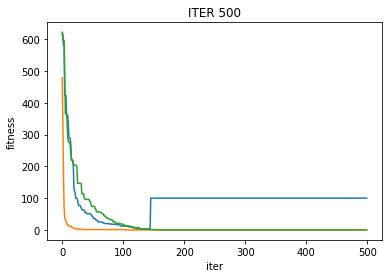

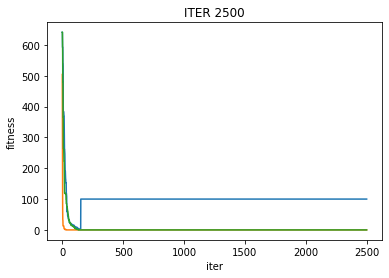

In [3]:
for run in range(RUNS):
    for kind in range(ITER_KINDS):

        ## Initial random variables, every algorithm has same initial
        arr = np.random.uniform(test.l_bound,test.u_bound, (AGENT_NUM, test.dim))

        #########   PSO   #########
        algo = PSO (dim=test.dim,num=AGENT_NUM,max_iter=ITER[kind], u_bound=test.u_bound, l_bound=test.l_bound, func=test.func, end_thres=end_thres)
        algo.pso_init(arr)
        algo.pso_iterator()

        # Resize the result to 2500
        tmp = algo.best_results.copy()
        tmp.resize(2500)
        RESULTS[0][run][kind] = tmp.copy()
        ###########################

        #########   GSA   #########
        algo = GSA (g_0 = G_0, dim=test.dim, num=AGENT_NUM, rate=ALPHA, k=K_best, max_iter=ITER[kind], u_bound=test.u_bound, l_bound=test.l_bound, func=test.func, end_thres=end_thres)
        algo.algorithm(arr)

        # Resize the result to 2500
        tmp = algo.best_results_so_far.copy()
        tmp.resize(2500)
        RESULTS[1][run][kind] = tmp.copy()
        ###########################

        #########   ABC   #########
        algo = ABC (dim=test.dim, num=AGENT_NUM, max_iter=ITER[kind], u_bound=test.u_bound, l_bound=test.l_bound, func=test.func, end_thres=end_thres)
        algo.abc_init(arr)
        algo.abc_iterator()

        # Resize the result to 2500
        tmp = algo.best_results.copy()
        tmp.resize(2500)
        RESULTS[2][run][kind] = tmp.copy()
        ###########################

for algo in range(ALGO):
    for kind in range(ITER_KINDS):

        average = np.zeros((ITER[1])) 
        for run in range(RUNS):

            average = average + RESULTS[algo][run][kind]
        AVERAGE_RESULT[algo][kind] = average / RUNS
plot_result()